# RedWine-Quality-Classifier-Using-Different-Models

In [4]:
#import modules required
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC #support vector classifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
%matplotlib inline

In [5]:
# load the RedWine quality dataset
wine = pd.read_csv("winequality-red.csv")

In [6]:
#preview the data
wine.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [7]:
# To retrieve the information about dataset
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# To check is dataset contains null values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
print(wine['quality'].value_counts())

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


## Data Preprocessing

In [ ]:
# Preprocessing Data

# Creating two bins called "Bad","Good" for better classification
# 1st bin values are (3 to 6.5)
# 2nd bin values are (7 to 8)

bins = (2, 6.5, 8)
group_names = ['bad','good']
wine['quality'] = pd.cut(wine['quality'],bins=bins,labels=group_names)

In [11]:
wine['quality'].head(5)

0    bad
1    bad
2    bad
3    bad
4    bad
Name: quality, dtype: category
Categories (2, object): ['bad' < 'good']

In [12]:
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [13]:
# Convert the string "good and bad" values into numerical

label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [14]:
print(label_quality.classes_)

['bad' 'good']


In [15]:
wine['quality'].value_counts()
# Here 
# 0 means "bad quality"
# 1 means "good quality"

quality
0    1382
1     217
Name: count, dtype: int64

C:\Users\AbhiLoki\AppData\Local\Temp\ipykernel_1992\1485013123.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality',data=wine,palette='viridis')


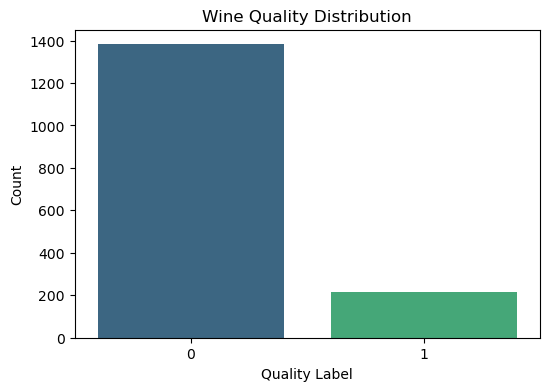

In [16]:
# plot the bar graph

plt.figure(figsize=(6,4))
sns.countplot(x='quality',data=wine,palette='viridis')
plt.title('Wine Quality Distribution')
plt.xlabel('Quality Label')
plt.ylabel('Count')
plt.show()

In [17]:
# Now separate the dataset as response variable and feature variables

X = wine.drop('quality',axis=1)
y = wine['quality']

In [18]:
# splitting of data for test and train

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
# Applying Standard scaling to get optimized result
#StandardScaler standardizes features by removing the mean and scaling to unit variance.

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## First Model - Random Forest Classifier

In [20]:
#load and fit the random forest classifier
rfc = RandomForestClassifier(n_estimators=200) # n estimators specify how many tress needed in forest
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [21]:
# predict for xtest data
pred_rfc = rfc.predict(X_test)

In [22]:
# Lets check how well the model performance is

print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

# precision → How many predicted as X are actually X.
# recall → Out of all true X, how many were correctly predicted.
# f1-score → Balance between precision & recall.
# support → Number of true samples of each class.

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       273
           1       0.70      0.40      0.51        47

    accuracy                           0.89       320
   macro avg       0.80      0.69      0.72       320
weighted avg       0.87      0.89      0.87       320

[[265   8]
 [ 28  19]]


In [37]:
accuracy_of_randomforest = accuracy_score(y_test, pred_rfc)
print("Accuracy:", accuracy_of_randomforest)

Accuracy: 0.8875


## Second Model - Support Vector Classifier

In [27]:
# load and fit the model
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [28]:
#predict for xtest
pred_clf = clf.predict(X_test)

In [29]:
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.38        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


In [36]:
accuracy_of_supportvector = accuracy_score(y_test, pred_clf)
print("Accuracy:", accuracy_of_supportvector)

Accuracy: 0.875


## Third Model - Neural Network(Multi layer perceptron)

In [32]:
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(11, 11, 11), max_iter=500)

In [33]:
pred_mlpc = mlpc.predict(X_test)

In [34]:
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       273
           1       0.66      0.57      0.61        47

    accuracy                           0.89       320
   macro avg       0.79      0.76      0.78       320
weighted avg       0.89      0.89      0.89       320

[[259  14]
 [ 20  27]]


In [35]:
accuracy_of_neuralnetwork = accuracy_score(y_test, pred_mlpc)
print("Accuracy:", accuracy_of_neuralnetwork)

Accuracy: 0.89375


## Fourth Model - XGBoost

In [40]:
xgboostmodel = XGBClassifier() 
xgboostmodel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [41]:
pred_xgboost = xgboostmodel.predict(X_test)

In [42]:
print(classification_report(y_test,pred_xgboost))
print(confusion_matrix(y_test,pred_xgboost))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       273
           1       0.81      0.53      0.64        47

    accuracy                           0.91       320
   macro avg       0.87      0.75      0.80       320
weighted avg       0.91      0.91      0.90       320

[[267   6]
 [ 22  25]]


In [43]:
acc_of_xgboost = accuracy_score(y_test, pred_xgboost)
print("Accuracy:", acc_of_xgboost)

Accuracy: 0.9125


### Comparsion of 4 Different Models Using Their Accuracy

In [44]:
# Convert to DataFrame for easy plotting

model_accuracies = {
    'Random Forest Classifier': 0.88,
    'Support Vector Classifier' : 0.87,
    'Neural Network (MLP)' : 0.89,
    'XGBoost Classifier': 0.91
    
}


acc_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])
acc_df

,Model,Accuracy
0,Random Forest Classifier,0.88
1,Support Vector Classifier,0.87
2,Neural Network (MLP),0.89
3,XGBoost Classifier,0.91


In [48]:
from tabulate import tabulate

print(tabulate(acc_df, headers='keys', tablefmt='pretty', showindex=False))

+---------------------------+----------+
|           Model           | Accuracy |
+---------------------------+----------+
| Random Forest Classifier  |   0.88   |
| Support Vector Classifier |   0.87   |
|   Neural Network (MLP)    |   0.89   |
|    XGBoost Classifier     |   0.91   |
+---------------------------+----------+


C:\Users\AbhiLoki\AppData\Local\Temp\ipykernel_1992\2189641656.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=acc_df, palette='viridis')


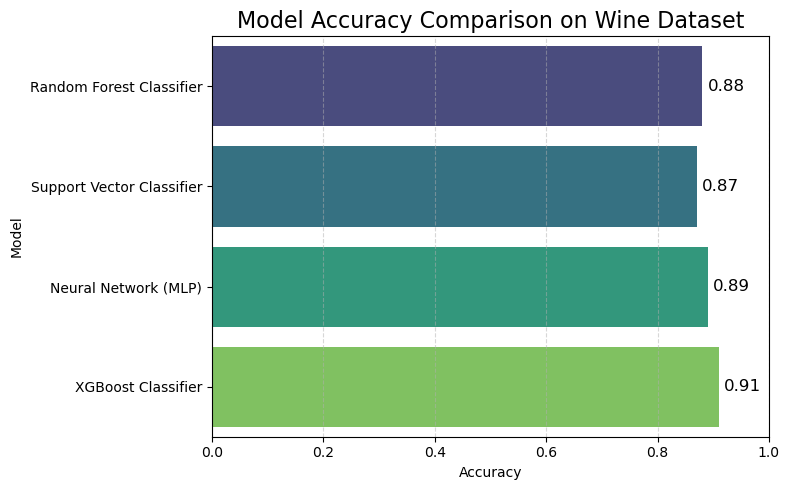

In [47]:
# plot the bar chart for better visulation

plt.figure(figsize=(8, 5))
sns.barplot(x='Accuracy', y='Model', data=acc_df, palette='viridis')

plt.title('Model Accuracy Comparison on Wine Dataset', fontsize=16)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.5)

for index, value in enumerate(acc_df['Accuracy']):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center', fontsize=12)

plt.tight_layout()
plt.show()

In [50]:
# As we seen the XGBoost Classifier Predicts the quality of RedWine more accurately when compared to other model , so the winner is "XGBOOST CLASSIFIER"

In [51]:
# Lets save the xgboost model for prediction

import joblib

joblib.dump(xgboostmodel, 'xgboost_wine_model.pkl')

['xgboost_wine_model.pkl']